In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

#### Normal Distribution
##### Generate random values

In [5]:
np.random.seed(0)
x_rand = np.random.normal(loc=0, scale=1.0, size=1000)

#### Visualization

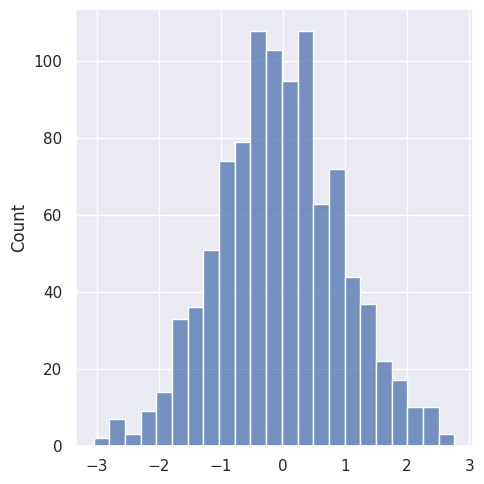

In [22]:
sns.displot(x_rand, kde=False)
plt.show()

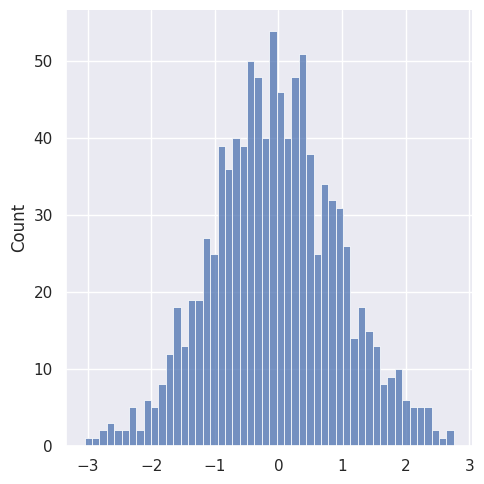

In [17]:
sns.displot(x_rand, bins=50, kde=False)
plt.show()

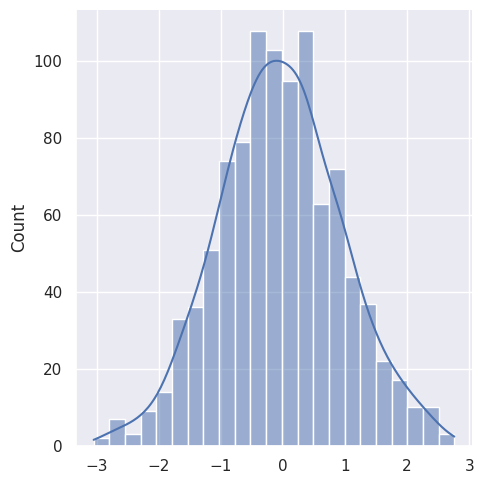

In [26]:
sns.displot(x_rand, kde=True)
plt.show()

/home/cedric/miniconda3/envs/mlbasics/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


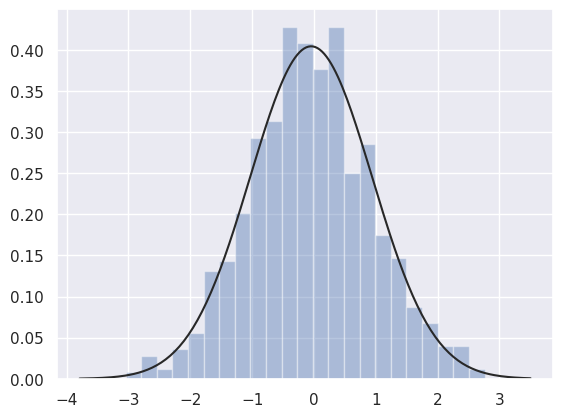

In [48]:
sns.distplot(x_rand, fit=stats.norm, kde=False)
plt.show()

#### Distribution fitting

In [51]:
loc, scale = stats.norm.fit(x_rand)

Now that we have fitted our distribution, we will proceed to use it
#### Probability Density Function (PDF)

Text(0, 0.5, 'PDF')

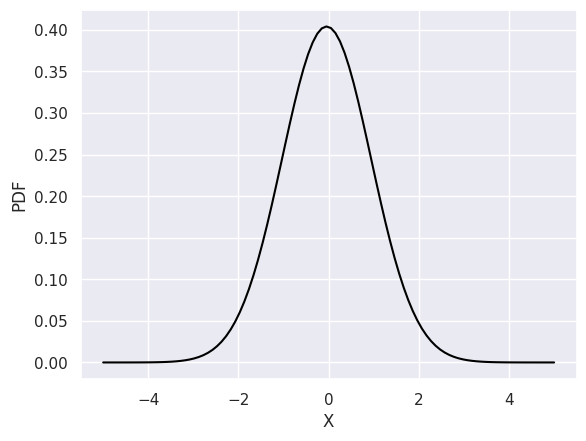

In [54]:
# linearly spaced values of x
x = np.linspace(start=-5, stop=5, num=100)
# find the density of each of these values
pdf = stats.norm.pdf(x, loc=loc, scale=scale)

# visualize this
plt.plot(x, pdf, color='black')
plt.xlabel('X')
plt.ylabel('PDF')

##### Cumulative Distribution Function (CDF)

Text(0, 0.5, 'CDF = P(x<=X)')

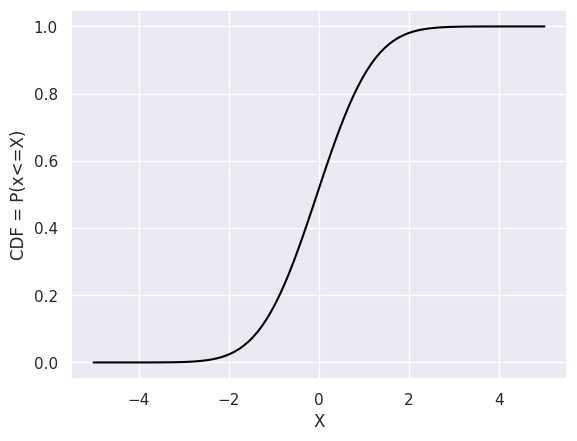

In [57]:
# cdf
cdf = stats.norm.cdf(x, loc=loc, scale=scale)

# visualize this
plt.plot(x, cdf, color='black')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')

### Percent Point Function (PPF)

Text(0, 0.5, 'PPF')

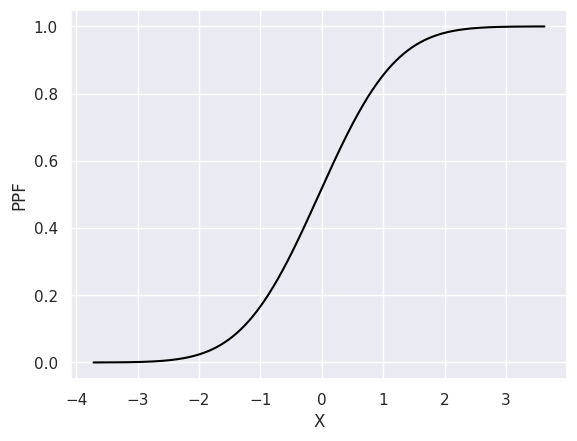

In [59]:
# linearly spaced values of CDF
cdf_ = np.linspace(start=0, stop=1, num=10000)

# 'x'
x_ = stats.norm.ppf(cdf_, loc=loc, scale=scale)

# visualize
plt.plot(x_, cdf_, color='black')
plt.xlabel('X')
plt.ylabel('PPF')

#### Using the CDF

Find the probability that variable X takes values less than 1

Text(0, 0.5, 'CDF = P(x<=X)')

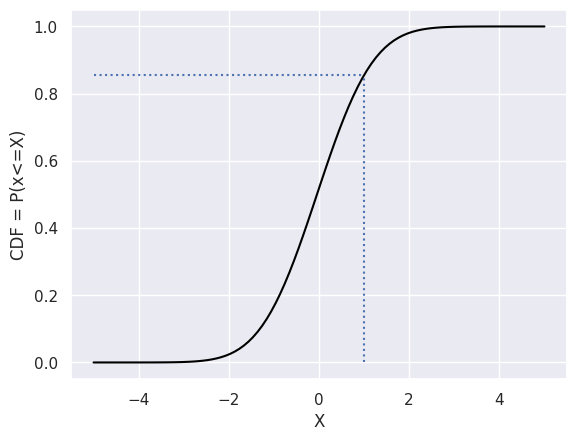

In [65]:
cdf_1 = stats.norm.cdf(1, loc=loc, scale=scale)

plt.plot(x, cdf, color='black')
plt.vlines(x=1, ymin=0, ymax=cdf_1, linestyle=':')
plt.hlines(y=cdf_1, xmin=-5, xmax=1, linestyle=':')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')

Find the value 'x' that is not exceeded 99% of the time

Text(0, 0.5, 'PPF')

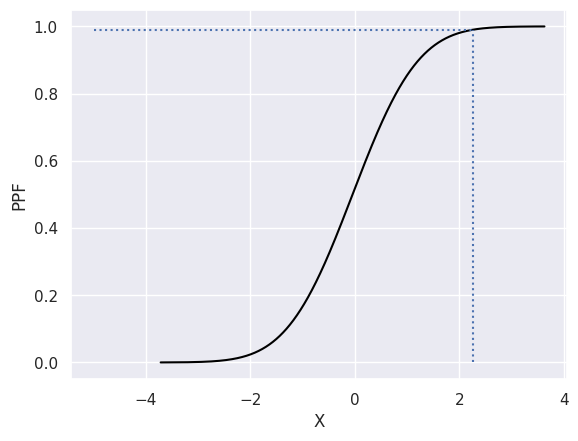

In [67]:
x_99 = stats.norm.ppf(0.99, loc=loc, scale=scale)

plt.plot(x_, cdf_, color='black')
plt.vlines(x=x_99, ymin=0, ymax=0.99, linestyle=':')
plt.hlines(y=0.99, xmin=-5, xmax=x_99, linestyle=':')
plt.xlabel('X')
plt.ylabel('PPF')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [4]:
spx = pd.read_csv('SPX.csv')
spx = spx[spx['Date'] >= '1990-01-01']
spx['pct'] = spx['Close'].pct_change()
pct = spx['pct'].to_numpy()
pct = np.delete(pct, 0)

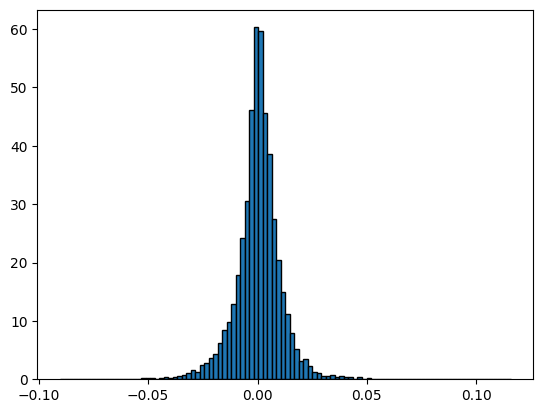

In [5]:
count, bins, patches = plt.hist(pct, bins=100, density=True, edgecolor='Black')

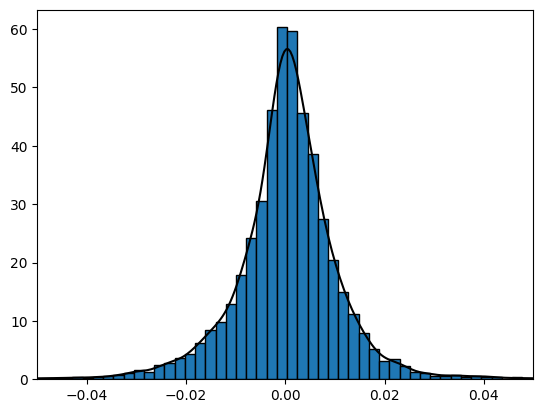

In [6]:
kde = stats.gaussian_kde(pct)
u = np.linspace(-.1, .1, 500)
v = kde.evaluate(u)

# superimpose the kde distribution curve over the histogram
count, bins, patches = plt.hist(pct, bins=100, density=True, edgecolor='Black')
plt.plot(u, v, 'k')
plt.xlim(-.05, .05)
plt.show()

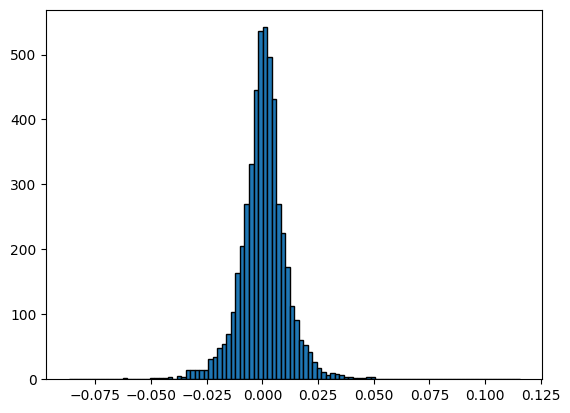

In [9]:
sample = kde.resample(5000)
c,b,p = plt.hist(sample[0], bins=100, edgecolor='black')

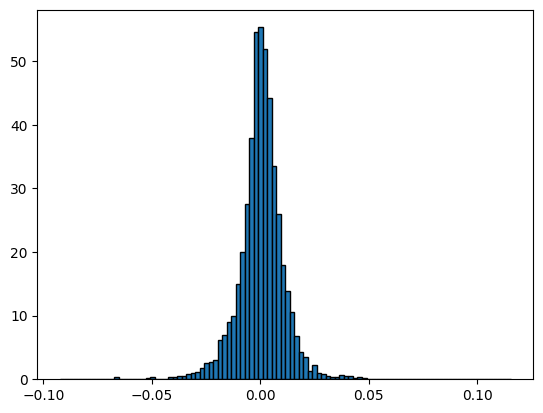

In [20]:
pct.shape = (pct.size, 1)
sk_kde = KernelDensity(bandwidth=kde.factor*pct.std(), kernel='gaussian').fit(pct)

sample2 = sk_kde.sample(5000)

c,b,p = plt.hist(sample2, bins=100, density=True, edgecolor='k')